# Case Study Introduction: Data Analysis for Bellabeat

#### In this case study, I take on the role of a junior data analyst at Bellabeat, a wellness technology company that creates smart health-focused products for women. My goal is to apply the data analysis process to explore how people use smart devices and uncover insights that can help guide Bellabeat’s marketing strategy.

#### Bellabeat offers a range of products, including the Bellabeat app, the Leaf wellness tracker, the Time smart watch, and the Spring smart water bottle, all of which track user's daily habits such as activity, sleep, hydration, and stress levels. To better understand consumer behavior, I analyzed a publicly available dataset from Fitbit users, focusing on identifying usage patterns and wellness trends.

#### The goal of this case study is to analyze public data from Fitbit users to **identify key trends in smart device usage and translate those insights into actionable marketing strategies for Bellabeat**.

## Key Stakeholders

* **Urška Sršen:** Bellabeat’s cofounder and Chief Creative Officer
* **Sando Mur:** Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* **Bellabeat marketing analytics team:** A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy. 


## The Data

#### The data used in this study was provided by Sršen and comes from a public dataset available on Kaggle. We will use two dataframes and merge them, the first one contains information from 30 users of the Fitbit fitness app, from April 12, 2016, to May 12, 2016, including data on daily activity, steps, and heart rate. The second one contains information about sleep rutines from some of those users. This data can be used to explore users' habits. 

## Setting up the environment

#### The analysis will be performed in Python, so we'll begin by importing the required libraries.

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Importing Dataset
#### The data is public and available on Kaggle, which makes it easy to incorporate into the notebook. We use the pandas library to read the .CSV files. Then, we use `info` to see a quick and informative overview of the dataframes.

In [2]:
activity_data = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
sleep_data = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')

#### Let's see what the structure of these dataframes is like.

In [3]:
activity_data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
sleep_data.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


#### Next, I will merge both dataframes, for this i'm going to use the `merge()` function because it allows me to join the two datasets based on shared columns, specifically, the user ID (Id) and the date of the record (Date). I ensure that all records from both datasets are included, even if one of them is missing data for a particular user or date. The resulting dataframe keeps the correct alignment between users and dates, and any missing values are filled with NaN, which most plotting libraries can handle automatically. For this I'm going to creat a new column called `Date` in both the daily activity and sleep activity dataframes. This step is necessary because each dataset originally had its own date column, with different names: `ActivityDate` in the activity data and `SleepDay` in the sleep data.

#### To ensure a proper merge, both dataframes need to share the same column name and format for the date. I used the `pd.to_datetime()` function to convert the original date columns into pandas datetime objects, which standardizes the format and allows for accurate comparison:

In [5]:
activity_data['Date'] = pd.to_datetime(activity_data['ActivityDate'])
sleep_data['Date'] = pd.to_datetime(sleep_data['SleepDay'])

merged = pd.merge(activity_data, sleep_data, on=['Id', 'Date'], how='outer')

merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        943 non-null    int64         
 1   ActivityDate              943 non-null    object        
 2   TotalSteps                943 non-null    int64         
 3   TotalDistance             943 non-null    float64       
 4   TrackerDistance           943 non-null    float64       
 5   LoggedActivitiesDistance  943 non-null    float64       
 6   VeryActiveDistance        943 non-null    float64       
 7   ModeratelyActiveDistance  943 non-null    float64       
 8   LightActiveDistance       943 non-null    float64       
 9   SedentaryActiveDistance   943 non-null    float64       
 10  VeryActiveMinutes         943 non-null    int64         
 11  FairlyActiveMinutes       943 non-null    int64         
 12  LightlyActiveMinutes  

#### As we can see, the dataset contains 20 columns and 943 rows. We can see that there are null values for the columns from the sleep activity dataframe. This is because, as i explained earlier, the dataframe was created by merging two dataframes with different numbers of rows. The number of users in the sleep activity dataframe is lower, as we can see bellow:

In [6]:
print(f"Number of unique users in daily activity data: {len(activity_data['Id'].unique())}\n"
      f"Number of unique users in sleep activity data: {len(sleep_data['Id'].unique())}")

Number of unique users in daily activity data: 33
Number of unique users in sleep activity data: 24


## Data Cleaning

#### Now that we have the merged dataframe, let's start cleaning it to get it in the best possible shape for analysis.                        
#### Because i created a new column called `Date`, that merges the dates from both dataframes, i can delete the other date columns from the daily activity and sleep activity dataframes (`ActivityDate` and `SleepDay`) 

In [7]:
merged = merged.drop(columns=['ActivityDate', 'SleepDay'])
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        943 non-null    int64         
 1   TotalSteps                943 non-null    int64         
 2   TotalDistance             943 non-null    float64       
 3   TrackerDistance           943 non-null    float64       
 4   LoggedActivitiesDistance  943 non-null    float64       
 5   VeryActiveDistance        943 non-null    float64       
 6   ModeratelyActiveDistance  943 non-null    float64       
 7   LightActiveDistance       943 non-null    float64       
 8   SedentaryActiveDistance   943 non-null    float64       
 9   VeryActiveMinutes         943 non-null    int64         
 10  FairlyActiveMinutes       943 non-null    int64         
 11  LightlyActiveMinutes      943 non-null    int64         
 12  SedentaryMinutes      

#### Now we have left the columns we need for analysis. 

#### Next thing i wanna do is change the names of the columns to a more "pythonic" way, because the column names are in CamelCase, and for Python, it is best practice to use snake_case. Since in this case i wanna switch from CamelCase to snake_case, it's easy to find a function(in this case im using regex) that does this. If the column names were more complex, it might have been necessary to change them one by one using a dictionary with the `columns` function.

In [8]:
def camel_to_snake(column):
    column = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', column)
    column = re.sub('([a-z0-9])([A-Z])', r'\1_\2', column)
    return column.lower()

merged.columns = [camel_to_snake(column) for column in merged.columns]
merged.head()

,id,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,date,total_sleep_records,total_minutes_asleep,total_time_in_bed
0,1503960366,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,1.0,327.0,346.0
1,1503960366,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,2.0,384.0,407.0
2,1503960366,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,2016-04-14,NaN,NaN,NaN
3,1503960366,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,1.0,412.0,442.0
4,1503960366,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,2.0,340.0,367.0


#### I don't need statistics about `id` column, so i will set it as the index of the dataframe. This facilitates indexing and accessing data by user.

In [9]:
merged.set_index('id', inplace=True)

In [10]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 1503960366 to 8877689391
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_steps                 943 non-null    int64         
 1   total_distance              943 non-null    float64       
 2   tracker_distance            943 non-null    float64       
 3   logged_activities_distance  943 non-null    float64       
 4   very_active_distance        943 non-null    float64       
 5   moderately_active_distance  943 non-null    float64       
 6   light_active_distance       943 non-null    float64       
 7   sedentary_active_distance   943 non-null    float64       
 8   very_active_minutes         943 non-null    int64         
 9   fairly_active_minutes       943 non-null    int64         
 10  lightly_active_minutes      943 non-null    int64         
 11  sedentary_minutes           943 non-null    int

#### We can see that now we have only 17 columns, one less, because `id` is no longer treated as a column of the dataset.

#### As we said earlier, there are missing values because some users doesn't have data about sleep activity. Let's confirm this with a dedicated function.

In [11]:
merged.isnull().sum()

total_steps                     0
total_distance                  0
tracker_distance                0
logged_activities_distance      0
very_active_distance            0
moderately_active_distance      0
light_active_distance           0
sedentary_active_distance       0
very_active_minutes             0
fairly_active_minutes           0
lightly_active_minutes          0
sedentary_minutes               0
calories                        0
date                            0
total_sleep_records           530
total_minutes_asleep          530
total_time_in_bed             530
dtype: int64

#### The columns from the sleep activity dataframe contain null values for users who don't have sleep activity records, but they are still present in the dataframe because they have daily activity records(daily activity dataframe). This is not a problem, since most plotting libraries automatically drop rows with missing values. For example, if we want to compare total minutes asleep with total steps, the function will only use data from users who have sleep activity records.

#### Now let's check if there is any duplicated row, and if there is, we will remove it, and if not, we can continue.

In [12]:
print(f"The total number of duplicated rows is: {merged.duplicated().sum()}")

The total number of duplicated rows is: 4


#### Time to delete the duplicated rows:

In [13]:
merged.drop_duplicates(inplace=True)
print(f"The total number of duplicated rows is: {merged.duplicated().sum()}")

The total number of duplicated rows is: 0


In [14]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 939 entries, 1503960366 to 8877689391
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_steps                 939 non-null    int64         
 1   total_distance              939 non-null    float64       
 2   tracker_distance            939 non-null    float64       
 3   logged_activities_distance  939 non-null    float64       
 4   very_active_distance        939 non-null    float64       
 5   moderately_active_distance  939 non-null    float64       
 6   light_active_distance       939 non-null    float64       
 7   sedentary_active_distance   939 non-null    float64       
 8   very_active_minutes         939 non-null    int64         
 9   fairly_active_minutes       939 non-null    int64         
 10  lightly_active_minutes      939 non-null    int64         
 11  sedentary_minutes           939 non-null    int

#### Now let's create two new columns. One for the total minutes of activity and another for the name of the day, given a date.

In [15]:
merged['total_activity_minutes'] = merged['very_active_minutes'] + merged['fairly_active_minutes'] + merged['lightly_active_minutes']
merged['total_activity_minutes'].to_frame()

,total_activity_minutes
id,
1503960366,366
1503960366,257
1503960366,222
1503960366,272
1503960366,267
...,...
8877689391,266
8877689391,309
8877689391,253


In [16]:
merged['week_day'] = merged['date'].dt.day_name()

#### Now the dataframe looks like this:

In [17]:
merged.head()

,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,date,total_sleep_records,total_minutes_asleep,total_time_in_bed,total_activity_minutes,week_day
id,,,,,,,,,,,,,,,,,,,
1503960366,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,1.0,327.0,346.0,366,Tuesday
1503960366,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,2.0,384.0,407.0,257,Wednesday
1503960366,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,2016-04-14,NaN,NaN,NaN,222,Thursday
1503960366,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,1.0,412.0,442.0,272,Friday
1503960366,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,2.0,340.0,367.0,267,Saturday


## Data Analysis and Visualization

#### Let's start by visualizing how the different levels of activity recorded among users are distributed. These levels are: very active minutes, fairly active minutes, lightly active minutes, and sedentary minutes.

In [18]:
# Setting the style of the grids

sns.set_style('darkgrid')

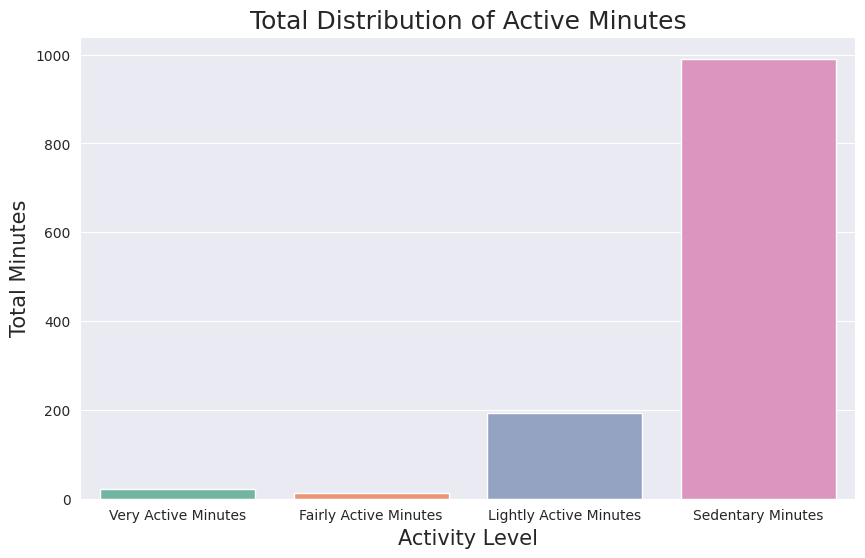

In [19]:
very_active = merged['very_active_minutes'].mean()
fairly_active = merged['fairly_active_minutes'].mean()
lightly_active = merged['lightly_active_minutes'].mean()
sedentary = merged['sedentary_minutes'].mean()

x = ['Very Active Minutes', 'Fairly Active Minutes', 'Lightly Active Minutes', 'Sedentary Minutes']
y = [very_active, fairly_active, lightly_active, sedentary]

plt.figure(figsize=(10, 6))
sns.barplot(x=x,y=y, palette='Set2')
plt.title('Total Distribution of Active Minutes', size=18)
plt.xlabel('Activity Level', size=15)
plt.ylabel('Total Minutes', size=15)
plt.show()

#### As we can see, most users are sedentary or spend the majority of their time without engaging in any type of physical activity. This is an important observation, it would be good to encourage or promote users to reduce their sedentary minutes and increase their physical activity.

#### Now let's analyze the total number of steps and how this affects the calories burned. We can expect the correlation between these two variables to be positive, that is, the higher the number of steps, the more calories burned.


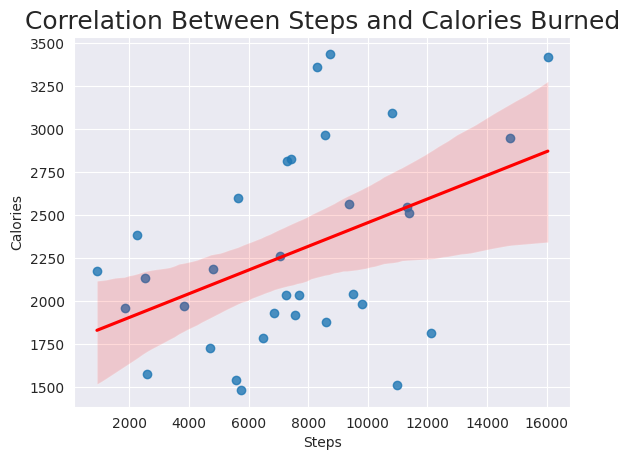

In [20]:
mean_steps = merged.groupby('id')['total_steps'].mean()
mean_calories = merged.groupby('id')['calories'].mean()

sns.regplot(x=mean_steps, y=mean_calories, line_kws={'color': 'red'})
plt.title('Correlation Between Steps and Calories Burned', size=18)
plt.xlabel('Steps')
plt.ylabel('Calories')
plt.show()

#### The chart confirms that the correlation between total step count and calories burned is positive. Considering the previous analysis on sedentary behavior, one recommendation that can be given to users is to go for walks: they may not enjoy playing sports, but walking is a great form of physical activity that is often underestimated.

#### That said, let's look at the percentage of users who walk, on average, more than 10,000 steps per day, which is recommended as a good goal for maintaining an active and healthy lifestyle, with benefits such as improved cardiovascular health and reduced stress, among others.

In [21]:
percentage = round((len(mean_steps[mean_steps > 10000]) / len(mean_steps)) * 100)
print(f"{percentage}% of the app's users walk, on average, more than 10,000 steps per day.")

21% of the app's users walk, on average, more than 10,000 steps per day.


#### This provides further evidence of users’ generally low activity levels, since only a very small percentage complete the required daily steps. Therefore, as mentioned earlier, encouraging them, via the app, to go for a walk is a good option.

#### Next, let’s examine the correlation between calories burned and each recorded user activity level. This will give us a broader view of how important activity is.

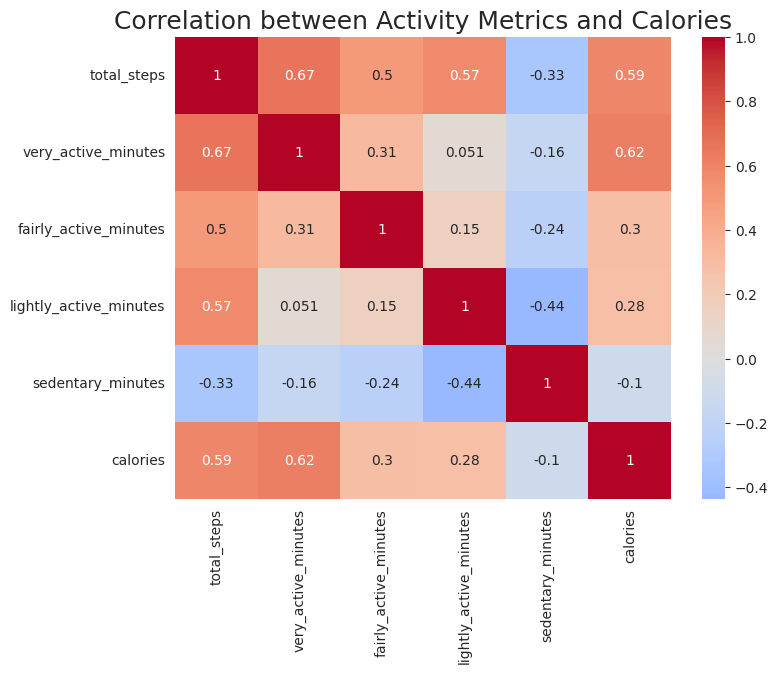

In [22]:
# First i need to create a correlation matrix for activity metrics and calories
activity_cols = ['total_steps', 'very_active_minutes', 'fairly_active_minutes',
                 'lightly_active_minutes', 'sedentary_minutes', 'calories']
correlation = merged[activity_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Activity Metrics and Calories', size=18)
plt.show()

#### We confirm once again that the correlation between total steps and calories burned is positive and strong. The same applies to very active minutes, which show the strongest correlation among all variables. This means that high-intensity activities (such as running or intense exercise) have a significant impact on calories burned.

#### Then, we observe that the correlation decreases as the intensity of the activity decreases. That is, fairly active and lightly active minutes also contribute to calorie burn, but to a smaller degree.

#### Finally, sedentary behavior is slightly negatively correlated with calories burned. As expected, increased inactive time is associated with fewer calories burned.



#### Another interesting aspect to analyze regarding physical activity time is whether it increases or decreases depending on the day of the week. Let's see if we can find some trends.

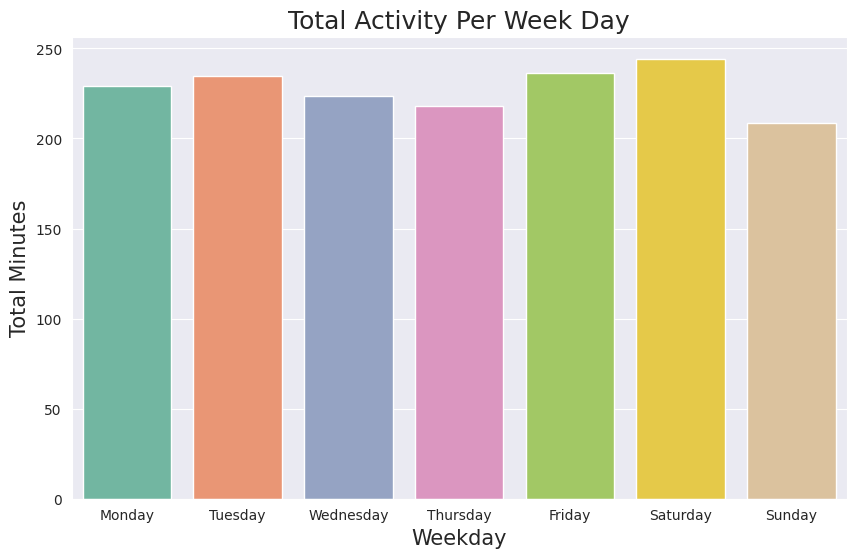

In [23]:
activity_per_day = merged.groupby('week_day')['total_activity_minutes'].mean()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
activity_per_day = activity_per_day.reindex(weekday_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=activity_per_day.index, y=activity_per_day.values, palette='Set2')
plt.title('Total Activity Per Week Day', size=18)
plt.ylabel('Total Minutes', size=15)
plt.xlabel('Weekday', size=15)
plt.show()

#### We can see that activity levels remain relatively consistent during the weekdays, with Tuesday and Friday showing slightly higher total activity compared to other days. Saturday stands out as the most active day of the week. This likely reflects the availability of more free time during the weekend, allowing users to engage in longer or more frequent physical activities. Sunday show the lowest active day of the week, maybe used for resting at the end of the week, or more recreative family activities. 

#### Now we are going to check if there is a correlation between the number of minutes users sleep and their physical activity. Perhaps the more rest they get, the more active they are. First, we will look at the correlation with total steps, and then with the total minutes of physical activity.

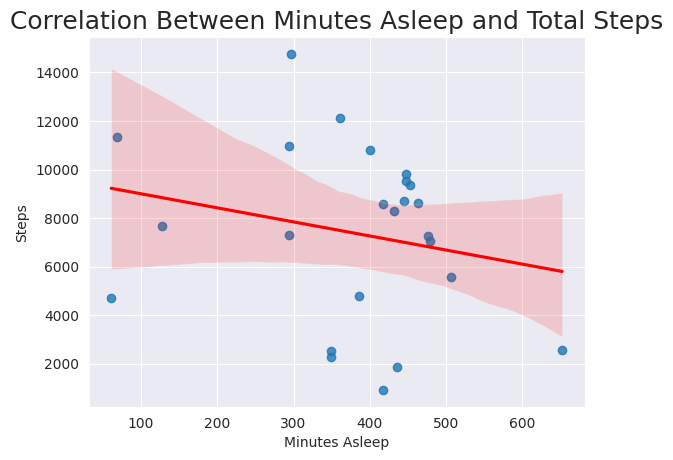

In [24]:
mean_steps = merged.groupby('id')['total_steps'].mean()
mean_minutes_asleep = merged.groupby('id')['total_minutes_asleep'].mean()

sns.regplot(x=mean_minutes_asleep, y=mean_steps, line_kws={'color': 'red'})
plt.title('Correlation Between Minutes Asleep and Total Steps', size=18)
plt.xlabel('Minutes Asleep')
plt.ylabel('Steps')
plt.show()

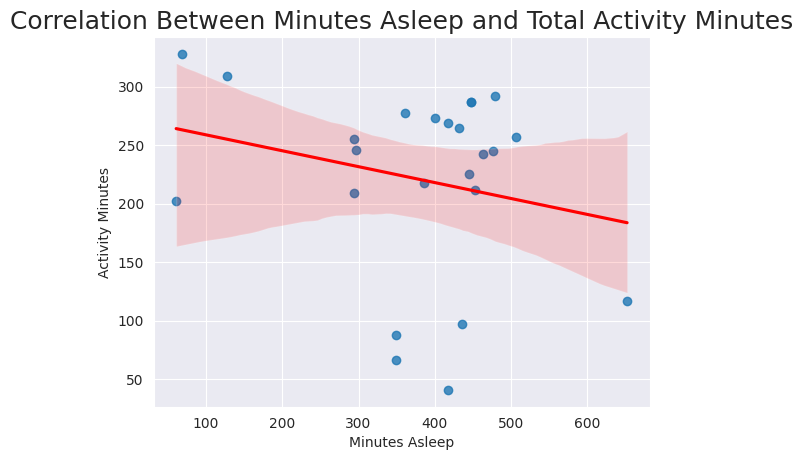

In [25]:
mean_activity_minutes = merged.groupby('id')['total_activity_minutes'].mean()
mean_minutes_asleep = merged.groupby('id')['total_minutes_asleep'].mean()

sns.regplot(x=mean_minutes_asleep, y=mean_activity_minutes, line_kws={'color': 'red'})
plt.title('Correlation Between Minutes Asleep and Total Activity Minutes', size=18)
plt.xlabel('Minutes Asleep')
plt.ylabel('Activity Minutes')
plt.show()

#### The charts show the opposite of what we expected: for both comparisons, the correlations are slightly negative. This suggests that, for this dataset, sleeping more is not associated with increased physical activity, but rather with a slight decrease. However, since the results are contrary to expectations, weak, and possibly not significant, it would be necessary and interesting to deepen the analysis with a larger dataset to confirm this trend.

#### Now let's analyze how many minutes users spend awake in bed. To do this, I will first create a new dataframe with the necessary columns, namely `total_minutes_asleep` and `total_time_in_bed`, discarding null values. Then, I will subtract the sleep minutes from the total time in bed to create a column called `awake_minutes_in_bed`, which represents the minutes spent awake in bed, and can be a good metric to measure the sleep quality: less time awake in bed, best sleep rutine.

Basic statistics:
       total_minutes_asleep  total_time_in_bed  awake_minutes_in_bed
count            410.000000         410.000000            410.000000
mean             419.173171         458.482927             39.309756
std              118.635918         127.455140             46.710932
min               58.000000          61.000000              0.000000
25%              361.000000         403.750000             17.000000
50%              432.500000         463.000000             25.500000
75%              490.000000         526.000000             40.000000
max              796.000000         961.000000            371.000000


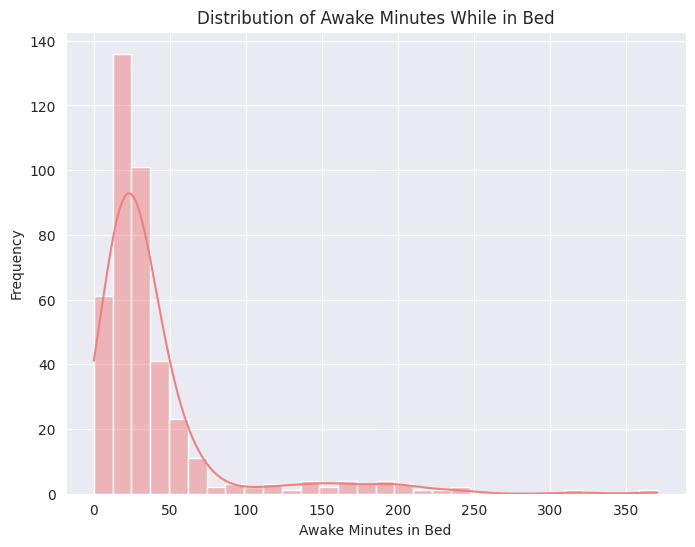

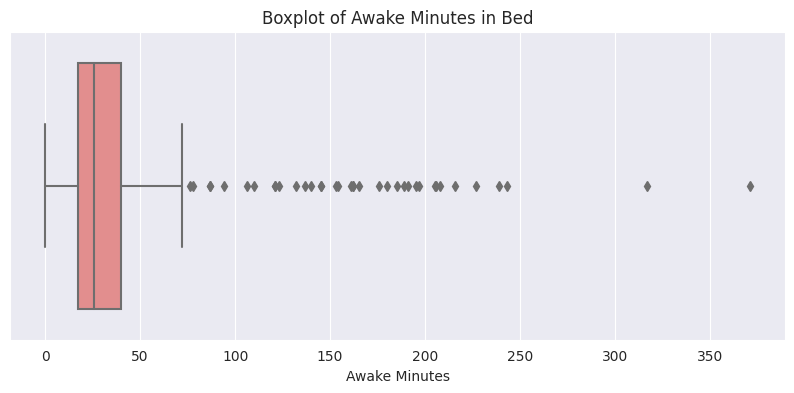

In [26]:
# Creating new dataframe
data_sleep = merged[['total_minutes_asleep', 'total_time_in_bed']].dropna()

# Calculating awake minutes in bed
data_sleep['awake_minutes_in_bed'] = data_sleep['total_time_in_bed'] - data_sleep['total_minutes_asleep']

print("Basic statistics:")
print(data_sleep.describe())

# Histogram:
plt.figure(figsize=(8, 6))
sns.histplot(data_sleep['awake_minutes_in_bed'], bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Awake Minutes While in Bed')
plt.xlabel('Awake Minutes in Bed')
plt.ylabel('Frequency')
plt.show()

# Boxplot:
plt.figure(figsize=(10, 4))
sns.boxplot(x=data_sleep['awake_minutes_in_bed'], color='lightcoral')
plt.title('Boxplot of Awake Minutes in Bed')
plt.xlabel('Awake Minutes')
plt.show()


#### The `describe()` function gives us basic statistics that help interpret the visualizations and show us, for example, that users spend on average per day:

* **419 minutes sleeping**  
* **458 minutes in bed** 
* **39 minutes awake in bed**

#### It also shows us the maximum and minimum values, and in this case we found that:

* **The maximum number of minutes asleep in a day was 796 minutes, that's 13 hours! This could be due to split records, such as a nap on the same day. It may be considered an outlier.**
* **The maximum number of minutes awake in bed is also striking: 371 minutes, or 6 hours! Like the previous point, this could be considered an outlier caused by multiple entries on the same day.**

#### Lastly, the median, meaning 50% of users, spend **25.5 minutes or less** awake in bed per day.

#### In the histogram, we see that most users spend approximately between **17 and 40 minutes** awake in bed each day (as shown in the basic statistics table by looking at the quartiles).

#### Finally, the boxplot clearly highlights the outliers, the points outside the "whiskers" of the box. Meanwhile, the box itself represents the range between the first and third quartiles, which contains the central 50% of the data. The line inside the box indicates the median, in this case, 25.5 minutes.

## Final Conclusions

#### After analyzing the Fitbit dataset, we found several key insights. First, it's important to clarify that the dataset size is limited: it only includes data from 30 users over a single month. Therefore, the following recommendations should be taken with caution and ideally validated using a larger dataset, potentially including more variables such as age, gender, or user location.

### **Sedentary Behavior:**
  #### As observed, most users spend the majority of their time without engaging in any physical activity. Bellabeat could consider sending notifications to users who remain sedentary for extended periods, reminding them of the importance of physical movement. Very few users meet the recommended daily step count, so encouraging walks might be a valuable suggestion. These reminders could be made customizable based on the time of day or user activity preferences.

### **Sleep Patterns:**
  #### On average, users sleep about 7 hours per day and do not spend much time awake in bed, although a few users do. The app could include tools to help improve users' sleep routines, such as reminders, meditation features, or smart alarms. It’s also worth emphasizing that studies show sleep quality tends to improve when physical activity is performed during the day.

### **Usage Patterns:**
  #### Activity levels and sleep durations vary depending on the day of the week. This suggests an opportunity to implement personalized recommendations based on individual weekly behavior trends.

### **Streaks and Achievements:**
  #### Introducing a system that rewards users for reaching activity streaks could be highly motivating. For example, awarding a badge for completing 10,000 steps on five consecutive days, with badges that can be upgraded over time, would encourage users to maintain their activity. Similar systems in other apps have shown to be effective in motivating users to keep up their habits.
